| Name                         | NRP        |
| ---------------------------- | ---------- |
| Muhammad Ihsan Al Khwaritsmi | 5025221211 |

# Artificial Neural Network

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2025-06-15 05:23:03.039047: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 05:23:03.083615: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-15 05:23:03.169786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749939783.269583   98650 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749939783.300112   98650 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749939783.413041   98650 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [40]:
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')
df.head()
df = df.drop('id', axis=1)

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Default (Standardisasi)

In [41]:
# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [42]:
# Model defininition
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

/home/alkhwaritsmi/ml-course/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Model Training
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)

Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7120 - loss: 0.5586 - val_accuracy: 0.7436 - val_loss: 0.4551
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8196 - loss: 0.4016 - val_accuracy: 0.7642 - val_loss: 0.4184
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8304 - loss: 0.3836 - val_accuracy: 0.7681 - val_loss: 0.4205
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8406 - loss: 0.3585 - val_accuracy: 0.7397 - val_loss: 0.4701
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8553 - loss: 0.3414 - val_accuracy: 0.7613 - val_loss: 0.4448
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8569 - loss: 0.3289 - val_accuracy: 0.8102 - val_loss: 0.3786
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3143 - val_accuracy: 0.8121 - val_loss: 0.3607
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8768 - loss: 0.2956 - val_accuracy: 0.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


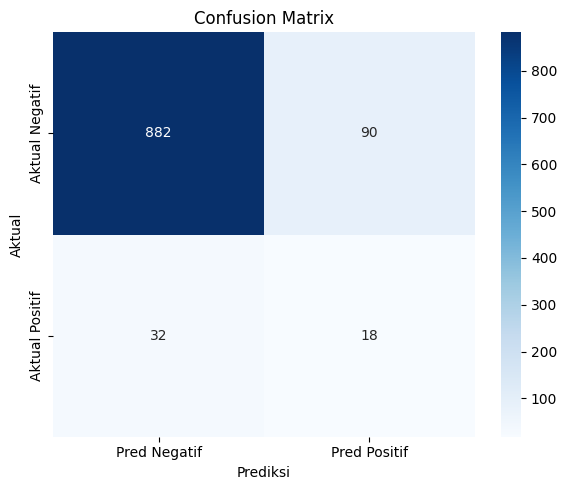

In [44]:
# Mendapatkan Prediksi dari Model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred Negatif', 'Pred Positif'],
            yticklabels=['Aktual Negatif', 'Aktual Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

In [45]:
# Menampilkan Hasil Evaluasi Sesuai Format
print("\n===== Hasil Evaluasi Model ANN =====")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")


===== Hasil Evaluasi Model ANN =====

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       972
           1       0.17      0.36      0.23        50

    accuracy                           0.88      1022
   macro avg       0.57      0.63      0.58      1022
weighted avg       0.93      0.88      0.90      1022


Skor AUC-ROC: 0.7443


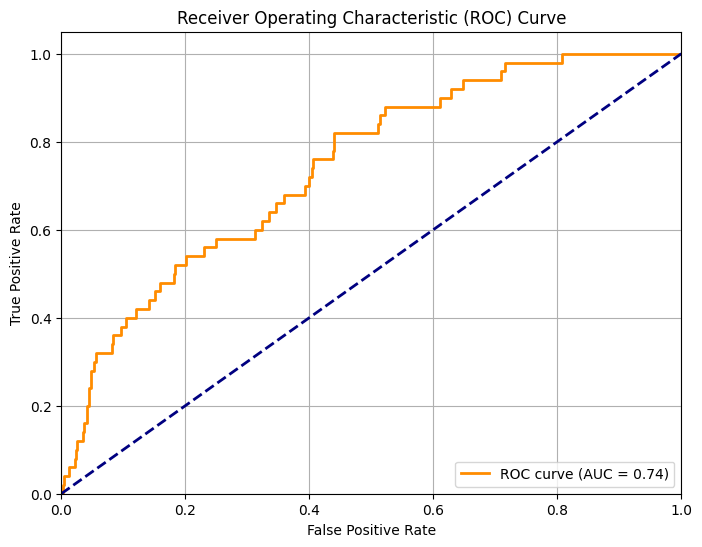

In [46]:
# Generate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## HyperParameter Tuning

In [47]:
import keras_tuner as kt

In [48]:
def build_model(hp):
    model = tf.keras.Sequential()

    # Atur jumlah unit di lapisan Dense pertama
    hp_units_1 = hp.Int('units_1', min_value=16, max_value=128, step=16)
    model.add(tf.keras.layers.Dense(units=hp_units_1, activation='relu', input_shape=[X_train_resampled.shape[1]]))

    # Atur tingkat dropout untuk lapisan pertama
    hp_dropout_1 = hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)
    model.add(tf.keras.layers.Dropout(hp_dropout_1))

    # Atur jumlah unit di lapisan Dense kedua
    hp_units_2 = hp.Int('units_2', min_value=8, max_value=64, step=8)
    model.add(tf.keras.layers.Dense(units=hp_units_2, activation='relu'))
    
    # Atur tingkat dropout untuk lapisan kedua
    hp_dropout_2 = hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)
    model.add(tf.keras.layers.Dropout(hp_dropout_2))

    # Lapisan output
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Atur learning rate untuk optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [49]:
# Menggunakan Hyperband untuk algoritma pencarian hyperparameter
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',          # Metric yang akan dioptimalkan
    max_epochs=20,                     # Jumlah epoch maksimum untuk melatih satu model
    factor=3,                          # Faktor reduksi untuk model dan epoch
    directory='keras_tuner_dir',       # untuk menyimpan hasil
    project_name='stroke_prediction',
    overwrite=True                     # Tambahkan ini untuk menimpa log sebelumnya
)

/home/alkhwaritsmi/ml-course/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Callback untuk menghentikan training lebih awal jika validation loss tidak membaik
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Mulai pencarian hyperparameter
# Catatan: Argumen 'epochs' dihapus dari search() karena sudah diatur oleh max_epochs di Hyperband.
tuner.search(X_train_resampled, y_train_resampled,
             validation_split=0.2,
             callbacks=[stop_early],
             verbose=1)

Trial 30 Complete [00h 00m 16s]
val_accuracy: 0.9768637418746948

Best val_accuracy So Far: 0.9813624620437622
Total elapsed time: 00h 03m 38s


In [51]:
# Hyperparameter paling optimal
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Hyperparameter optimal ditemukan:
- Units 1: {best_hps.get('units_1')}
- Dropout 1: {best_hps.get('dropout_1'):.2f}
- Units 2: {best_hps.get('units_2')}
- Dropout 2: {best_hps.get('dropout_2'):.2f}
- Learning Rate: {best_hps.get('learning_rate')}
""")


Hyperparameter optimal ditemukan:
- Units 1: 48
- Dropout 1: 0.00
- Units 2: 40
- Dropout 2: 0.20
- Learning Rate: 0.01



In [52]:
# Bangun model dengan hyperparameter terbaik
model = tuner.hypermodel.build(best_hps)

# Latih ulang model pada seluruh data training yang sudah di-resampling
# Kita bisa menggunakan lebih banyak epoch di sini karena ada EarlyStopping
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50, 
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[stop_early],
                    verbose=1)

Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7642 - loss: 0.4710 - val_accuracy: 0.7280 - val_loss: 0.4476
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.3460 - val_accuracy: 0.7681 - val_loss: 0.4246
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - loss: 0.3069 - val_accuracy: 0.8033 - val_loss: 0.3712
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8774 - loss: 0.2840 - val_accuracy: 0.8278 - val_loss: 0.4150
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8969 - loss: 0.2487 - val_accuracy: 0.7710 - val_loss: 0.5354
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9024 - loss: 0.2395 - val_accuracy: 0.8376 - val_loss: 0.4850
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8966 - loss: 0.2493 - val_accuracy: 0.8112 - val_loss: 0.5014
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9166 - loss: 0.2083 - val_accuracy: 0.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


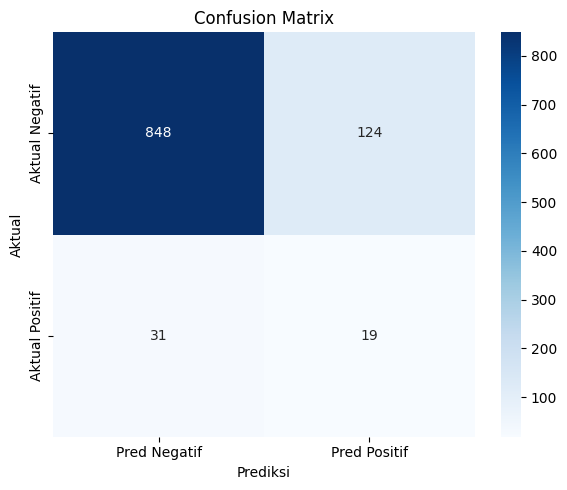

In [53]:
# Mendapatkan Prediksi dari Model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred Negatif', 'Pred Positif'],
            yticklabels=['Aktual Negatif', 'Aktual Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

In [54]:
# Menampilkan Hasil Evaluasi Sesuai Format
print("\n===== Hasil Evaluasi Model ANN =====")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")


===== Hasil Evaluasi Model ANN =====

Laporan Klasifikasi:


              precision    recall  f1-score   support

           0       0.96      0.87      0.92       972
           1       0.13      0.38      0.20        50

    accuracy                           0.85      1022
   macro avg       0.55      0.63      0.56      1022
weighted avg       0.92      0.85      0.88      1022


Skor AUC-ROC: 0.7413


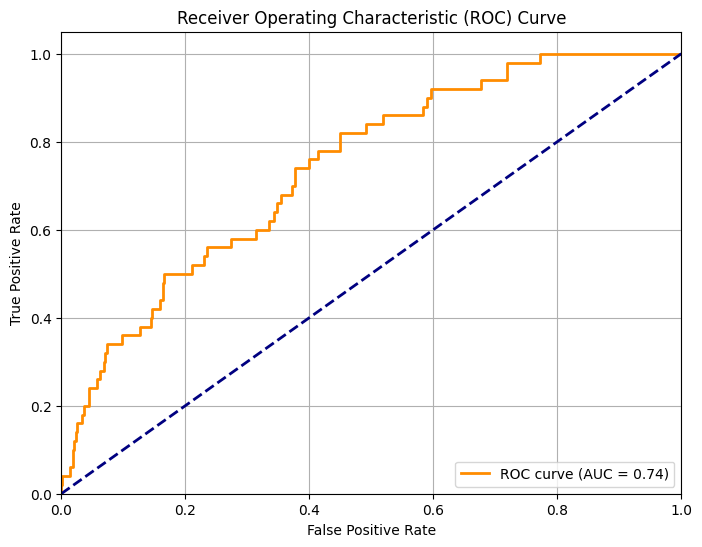

In [55]:
# plot kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Standardisasi vs Normalisasi

### Normalisasi

In [66]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)


/home/alkhwaritsmi/ml-course/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5491 - loss: 0.6879 - val_accuracy: 0.6096 - val_loss: 0.6036
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6312 - loss: 0.6328 - val_accuracy: 0.5675 - val_loss: 0.5697
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6702 - loss: 0.5902 - val_accuracy: 0.6243 - val_loss: 0.5299
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7161 - loss: 0.5537 - val_accuracy: 0.6595 - val_loss: 0.4962
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7295 - loss: 0.5399 - val_accuracy: 0.6771 - val_loss: 0.4743
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7458 - loss: 0.5070 - val_accuracy: 0.7035 - val_loss: 0.4494
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7630 - loss: 0.4916 - val_accuracy: 0.7143 - val_loss: 0.4499
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7723 - loss: 0.4806 - val_accuracy: 0.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


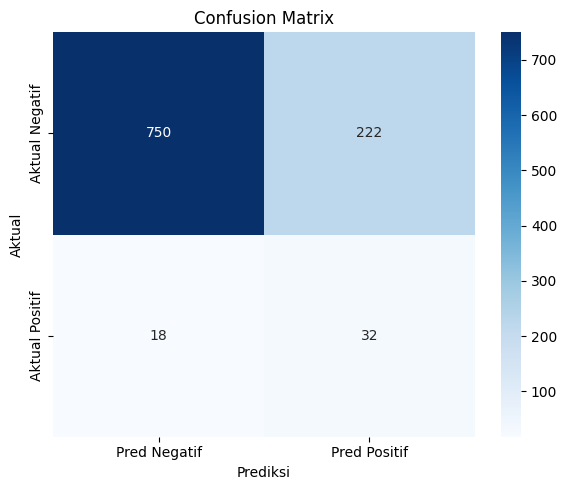

In [58]:
# Mendapatkan Prediksi dari Model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred Negatif', 'Pred Positif'],
            yticklabels=['Aktual Negatif', 'Aktual Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

In [59]:
# Menampilkan Hasil Evaluasi Sesuai Format
print("\n===== Hasil Evaluasi Model ANN =====")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")


===== Hasil Evaluasi Model ANN =====

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       972
           1       0.13      0.64      0.21        50

    accuracy                           0.77      1022
   macro avg       0.55      0.71      0.54      1022
weighted avg       0.93      0.77      0.83      1022


Skor AUC-ROC: 0.8006


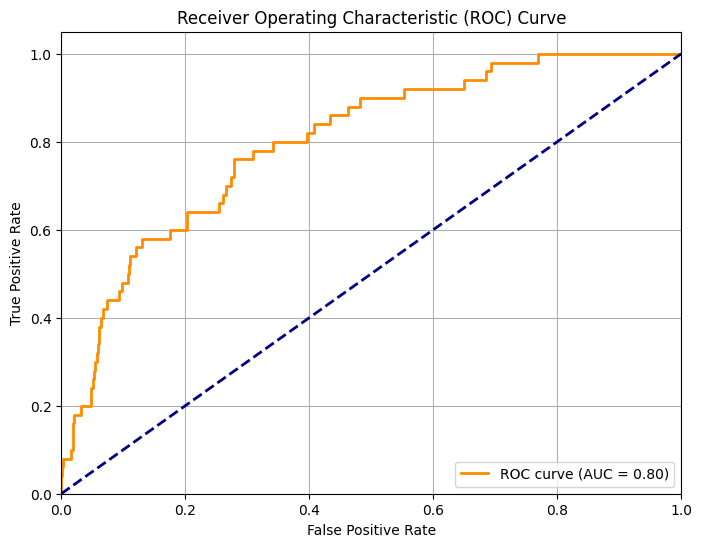

In [60]:
# Generate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Feature Engineering

In [5]:
df = pd.read_csv('data/stroke-data-feat-eng-one-hot.csv')
df = df.drop('id',axis=1)
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [6]:
# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [7]:
# Model defininition
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[X_train_resampled.shape[1]]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/home/alkhwaritsmi/ml-course/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,713 (14.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)

Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6803 - loss: 0.6383 - val_accuracy: 0.8356 - val_loss: 0.2960
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8901 - loss: 0.2818 - val_accuracy: 0.9022 - val_loss: 0.1953
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9365 - loss: 0.1889 - val_accuracy: 0.9315 - val_loss: 0.1503
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9506 - loss: 0.1443 - val_accuracy: 0.9413 - val_loss: 0.1394
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9610 - loss: 0.1184 - val_accuracy: 0.9432 - val_loss: 0.1384
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9667 - loss: 0.1074 - val_accuracy: 0.9511 - val_loss: 0.1088
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0923 - val_accuracy: 0.9550 - val_loss: 0.0955
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0902 - val_accuracy: 0.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


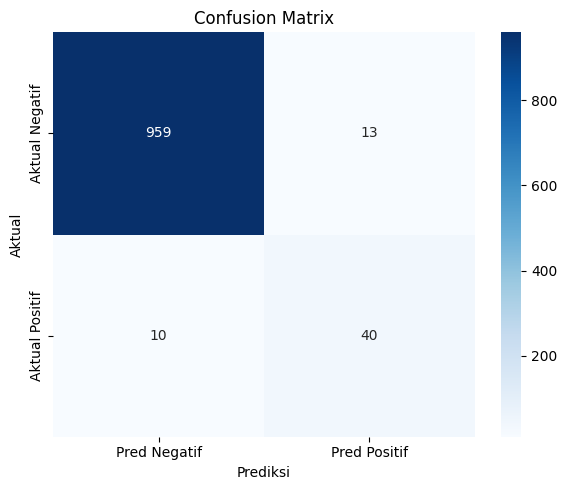

In [9]:
# Mendapatkan Prediksi dari Model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred Negatif', 'Pred Positif'],
            yticklabels=['Aktual Negatif', 'Aktual Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

In [10]:
# Menampilkan Hasil Evaluasi Sesuai Format
print("\n===== Hasil Evaluasi Model ANN =====")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")


===== Hasil Evaluasi Model ANN =====

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       972
           1       0.75      0.80      0.78        50

    accuracy                           0.98      1022
   macro avg       0.87      0.89      0.88      1022
weighted avg       0.98      0.98      0.98      1022


Skor AUC-ROC: 0.9875


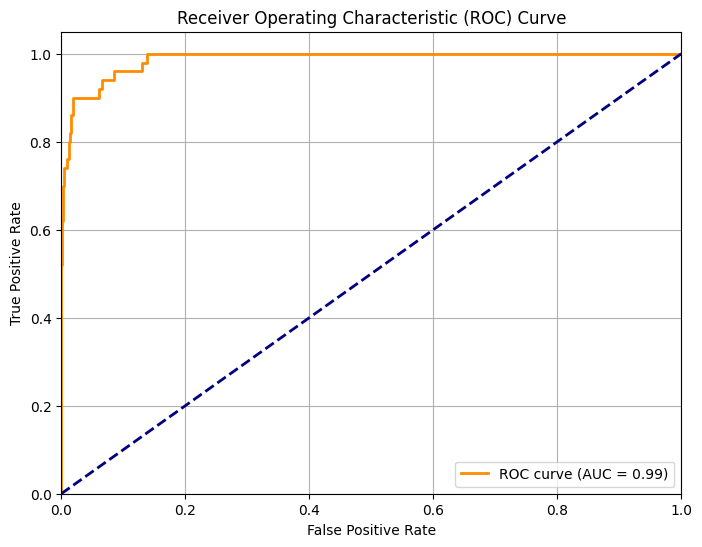

In [11]:
# Generate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()